In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
df = pd.read_csv('Data_input_1.csv', parse_dates=['Date'], index_col='Date')
print(df.shape)
df.head()

(1258, 4)


,Close/Last,Open,High,Low
Date,,,,
2024-05-30,10205.24,10332.57,10348.39,10174.34
2024-05-29,10396.40,10386.55,10451.02,10386.55
2024-05-28,10526.85,10592.65,10594.29,10462.57
2024-05-24,10549.22,10494.50,10616.85,10480.60
2024-05-23,10495.82,10698.18,10704.39,10444.49


In [73]:
data = df.iloc[::-1]
data.rename(columns = {'Close/Last':'Close'}, inplace = True)
data.head()

,Close,Open,High,Low
Date,,,,
2019-06-03,4170.02,4255.18,4264.98,4145.45
2019-06-04,4320.98,4230.68,4322.79,4199.29
2019-06-05,4329.21,4359.99,4372.12,4279.17
2019-06-06,4375.45,4338.55,4388.83,4321.69
2019-06-07,4435.80,4398.04,4453.16,4390.15


In [74]:
data.isnull().sum()

Close    0
Open     0
High     0
Low      0
dtype: int64

# Trực quan hóa dữ liệu

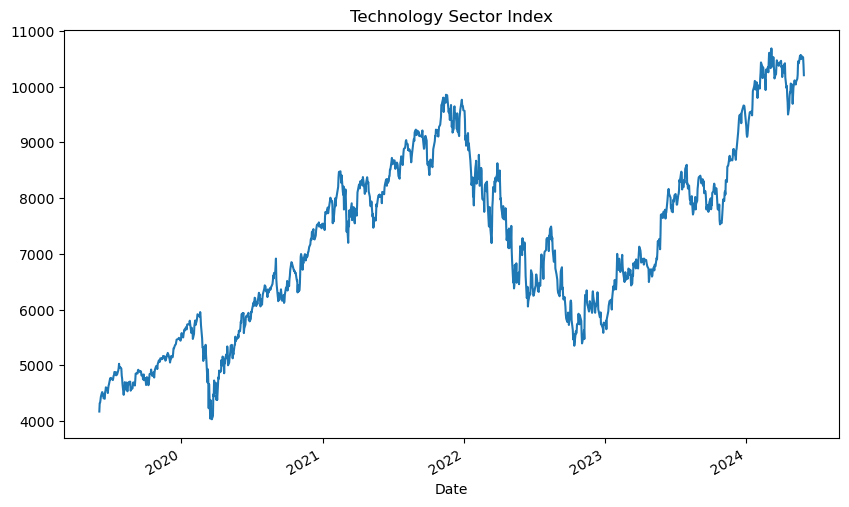

In [75]:
data['Close'].plot(figsize=(10, 6))
plt.title('Technology Sector Index')
plt.show()

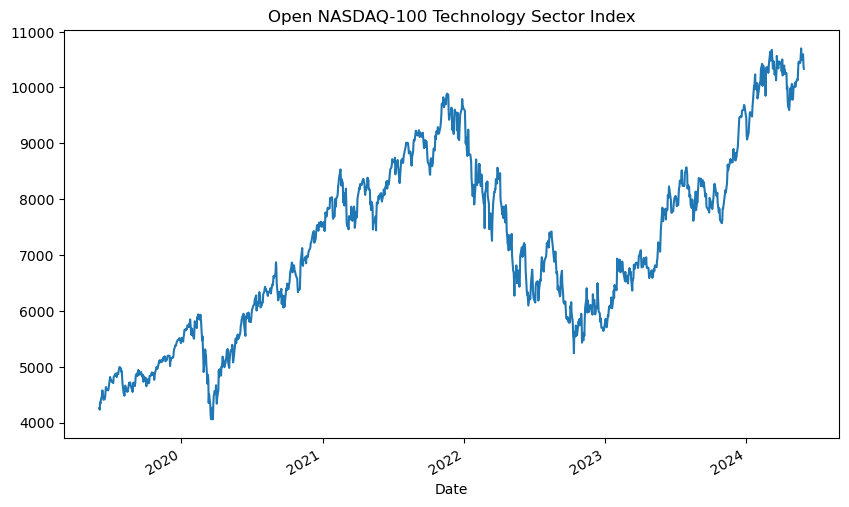

In [76]:
data['Open'].plot(figsize=(10, 6))
plt.title('Open NASDAQ-100 Technology Sector Index')
plt.show()

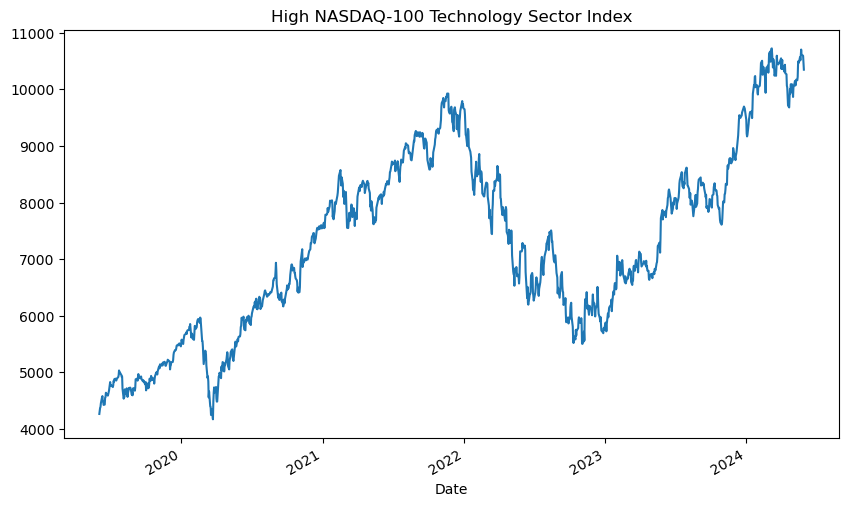

In [77]:
data['High'].plot(figsize=(10, 6))
plt.title('High NASDAQ-100 Technology Sector Index')
plt.show()

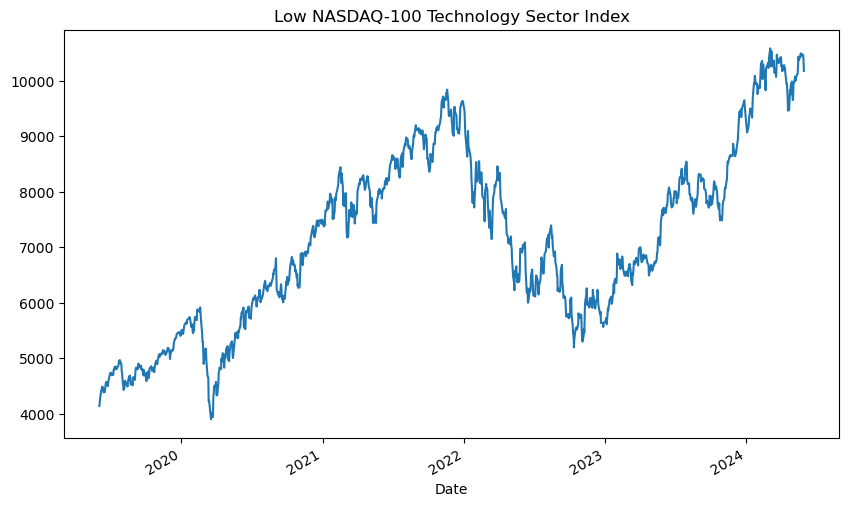

In [78]:
data['Low'].plot(figsize=(10, 6))
plt.title('Low NASDAQ-100 Technology Sector Index')
plt.show()

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

Text(0.5, 1.0, 'Low')

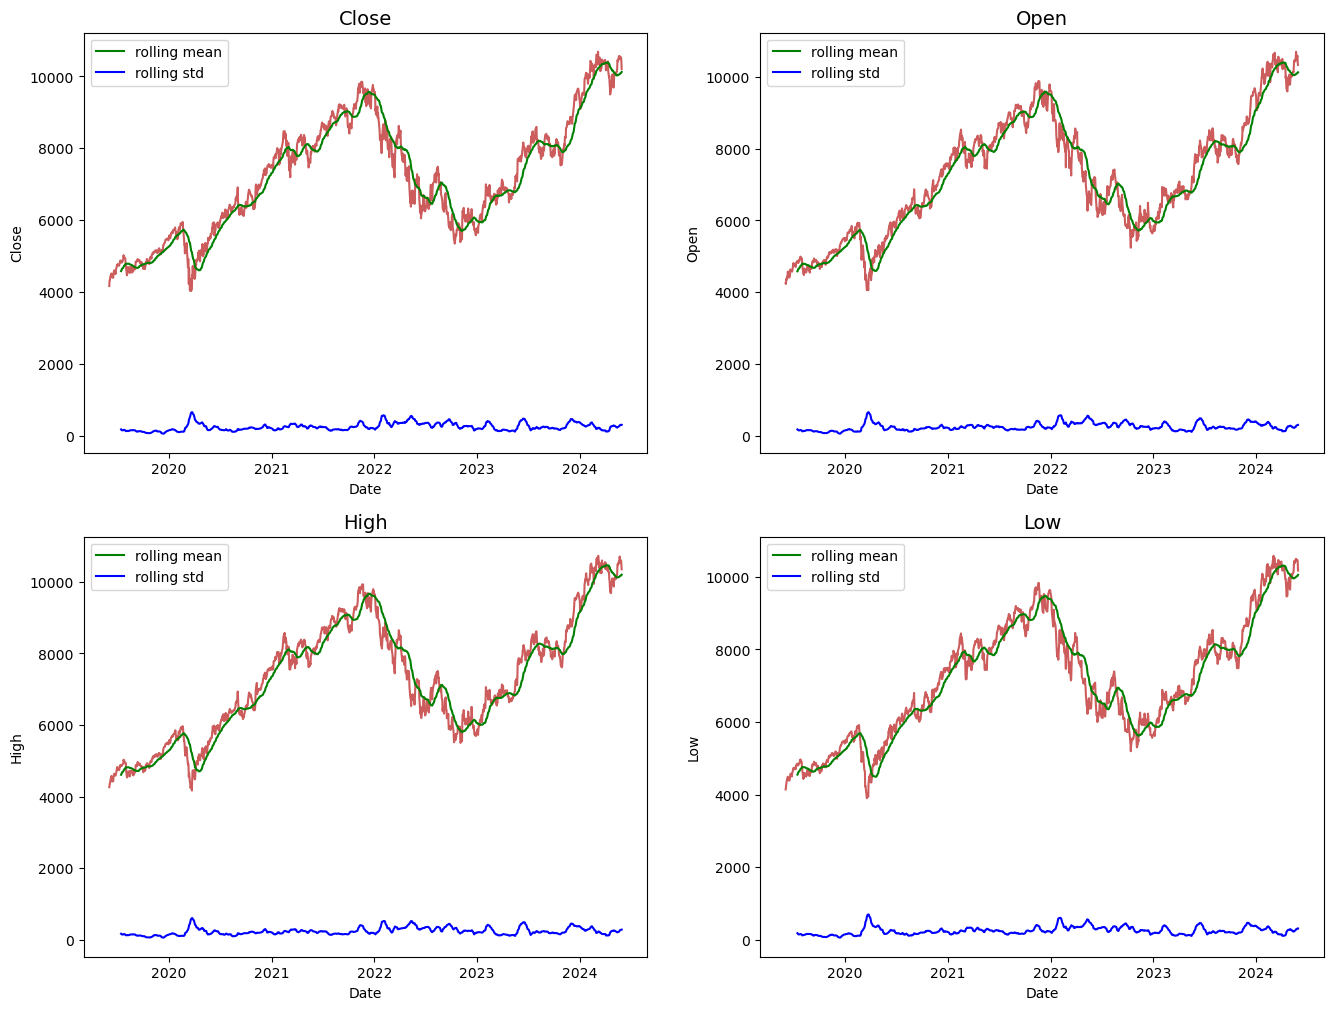

In [79]:
rolling_window = 30
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.lineplot(x=data.index, y=data.Close, ax=ax[0, 0], color='indianred')
sns.lineplot(x=data.index, y=data.Close.rolling(rolling_window).mean(), ax=ax[0, 0], color='green', label='rolling mean')
sns.lineplot(x=data.index, y=data.Close.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('Close', fontsize=14)
# ax[0, 0].set_ylabel(ylabel='Close', fontsize=14)

sns.lineplot(x=data.index, y=data.Open, ax=ax[0, 1], color='indianred')
sns.lineplot(x=data.index, y=data.Open.rolling(rolling_window).mean(), ax=ax[0, 1], color='green', label='rolling mean')
sns.lineplot(x=data.index, y=data.Open.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('Open', fontsize=14)
# ax[0, 1].set_ylabel(ylabel='Open', fontsize=14)

sns.lineplot(x=data.index, y=data.High, ax=ax[1, 0], color='indianred')
sns.lineplot(x=data.index, y=data.High.rolling(rolling_window).mean(), ax=ax[1, 0], color='green', label='rolling mean')
sns.lineplot(x=data.index, y=data.High.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('High', fontsize=14)
# ax[1, 0].set_ylabel(ylabel='High', fontsize=14)

sns.lineplot(x=data.index, y=data.Low, ax=ax[1, 1], color='indianred')
sns.lineplot(x=data.index, y=data.Low.rolling(rolling_window).mean(), ax=ax[1, 1], color='green', label='rolling mean')
sns.lineplot(x=data.index, y=data.Low.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('Low', fontsize=14)
# ax[1, 1].set_ylabel(ylabel='Low', fontsize=14)

Trend/Season Decompose

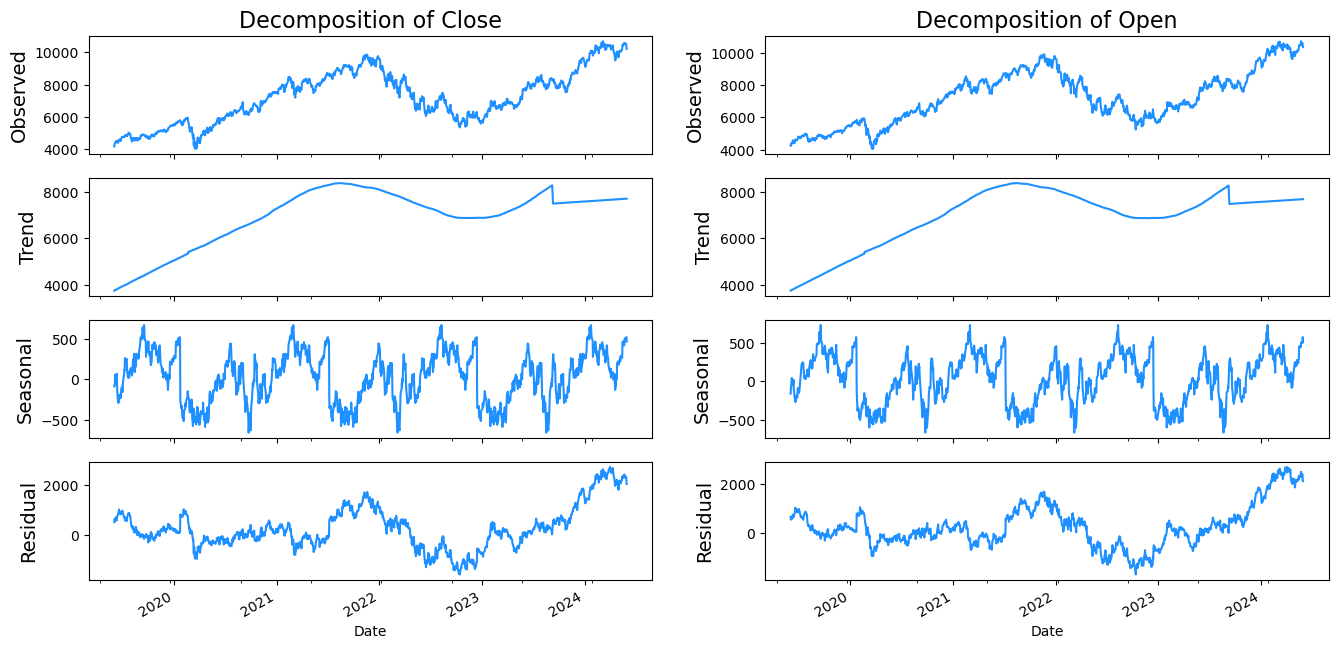

In [80]:
fig_2, ax_2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

ax_2[0,0].set_title('Decomposition of Close', fontsize=16)
res = seasonal_decompose(data['Close'], period = 365, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax_2[0,0], legend=False, color='dodgerblue')
ax_2[0,0].set_ylabel('Observed', fontsize=14)
# ax_2[0,0].set_ylim([-5, 35])

res.trend.plot(ax=ax_2[1,0], legend=False, color='dodgerblue')
ax_2[1,0].set_ylabel('Trend', fontsize=14)
# ax_2[1,0].set_ylim([-5, 35])

res.seasonal.plot(ax=ax_2[2,0], legend=False, color='dodgerblue')
ax_2[2,0].set_ylabel('Seasonal', fontsize=14)
# ax_2[2,0].set_ylim([-15, 15])

res.resid.plot(ax=ax_2[3,0], legend=False, color='dodgerblue')
ax_2[3,0].set_ylabel('Residual', fontsize=14)
# ax_2[3,0].set_ylim([-15, 15])

ax_2[0, 1].set_title('Decomposition of Open', fontsize=16)
res_comp = seasonal_decompose(data['Open'], period = 365, model='additive', extrapolate_trend='freq')

res_comp.observed.plot(ax=ax_2[0, 1], legend=False, color='dodgerblue')
ax_2[0, 1].set_ylabel('Observed', fontsize=14)

res_comp.trend.plot(ax=ax_2[1, 1], legend=False, color='dodgerblue')
ax_2[1, 1].set_ylabel('Trend', fontsize=14)

res_comp.seasonal.plot(ax=ax_2[2, 1], legend=False, color='dodgerblue')
ax_2[2, 1].set_ylabel('Seasonal', fontsize=14)

res_comp.resid.plot(ax=ax_2[3, 1], legend=False, color='dodgerblue')
ax_2[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

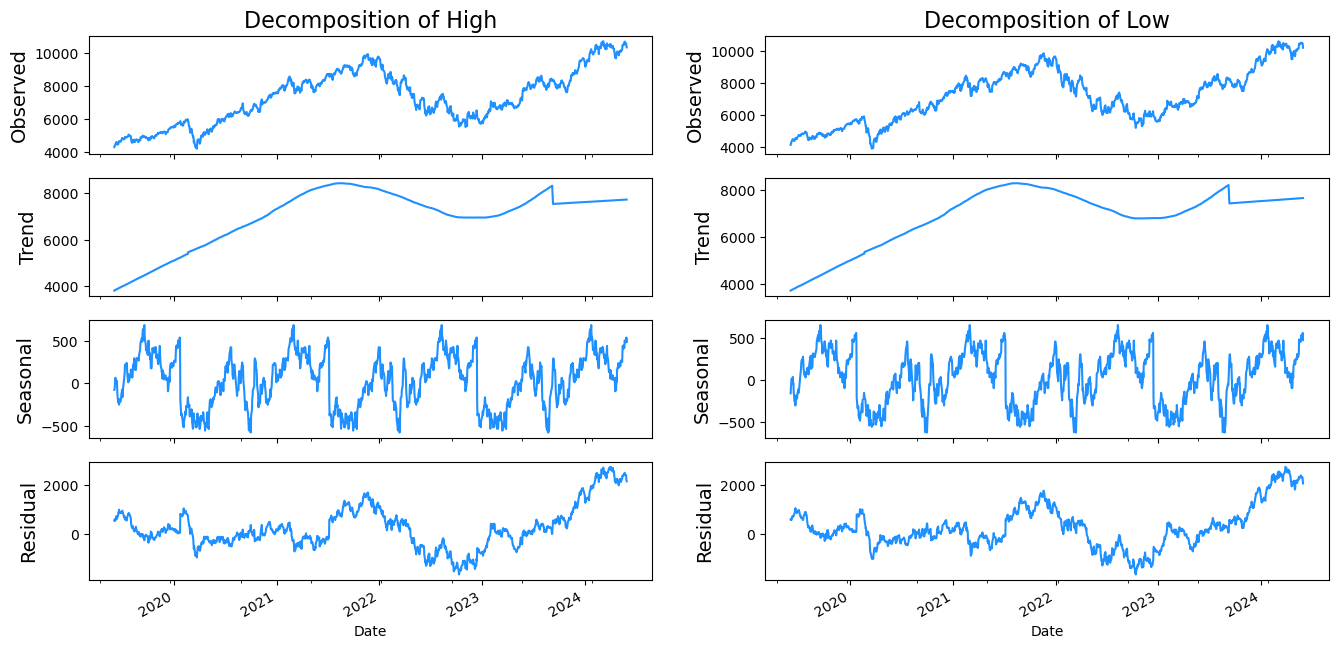

In [81]:
fig_2, ax_2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

ax_2[0,0].set_title('Decomposition of High', fontsize=16)
res = seasonal_decompose(data['High'], period = 365, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax_2[0,0], legend=False, color='dodgerblue')
ax_2[0,0].set_ylabel('Observed', fontsize=14)


res.trend.plot(ax=ax_2[1,0], legend=False, color='dodgerblue')
ax_2[1,0].set_ylabel('Trend', fontsize=14)


res.seasonal.plot(ax=ax_2[2,0], legend=False, color='dodgerblue')
ax_2[2,0].set_ylabel('Seasonal', fontsize=14)


res.resid.plot(ax=ax_2[3,0], legend=False, color='dodgerblue')
ax_2[3,0].set_ylabel('Residual', fontsize=14)


ax_2[0, 1].set_title('Decomposition of Low', fontsize=16)
res_comp = seasonal_decompose(data['Low'], period = 365, model='additive', extrapolate_trend='freq')

res_comp.observed.plot(ax=ax_2[0, 1], legend=False, color='dodgerblue')
ax_2[0, 1].set_ylabel('Observed', fontsize=14)

res_comp.trend.plot(ax=ax_2[1, 1], legend=False, color='dodgerblue')
ax_2[1, 1].set_ylabel('Trend', fontsize=14)

res_comp.seasonal.plot(ax=ax_2[2, 1], legend=False, color='dodgerblue')
ax_2[2, 1].set_ylabel('Seasonal', fontsize=14)

res_comp.resid.plot(ax=ax_2[3, 1], legend=False, color='dodgerblue')
ax_2[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Features')

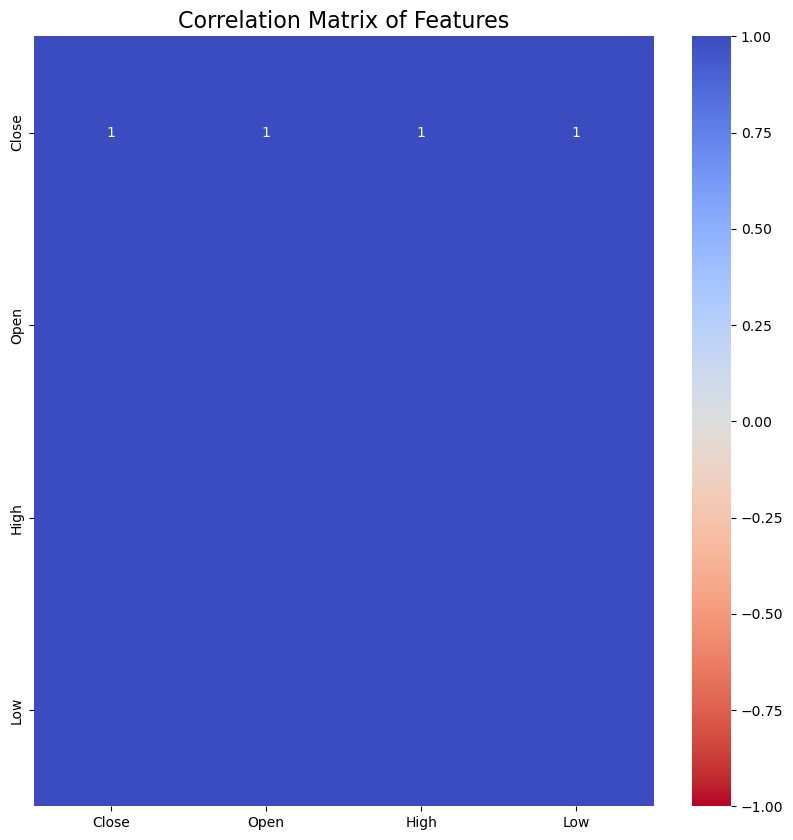

In [82]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

original_cols = ['Close', 
                 'Open',
                 'High', 'Low']

corrmat = data[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
ax.set_title('Correlation Matrix of Features', fontsize=16)

# Kiểm định nhân quả 

In [83]:
from statsmodels.tsa.stattools import grangercausalitytests

In [84]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\sta

,Close_x,Open_x,High_x,Low_x
Close_y,1.0,0.0326,0.0582,0.0002
Open_y,0.0,1.0000,0.0000,0.0000
High_y,0.0,0.0000,1.0000,0.0000
Low_y,0.0,0.0000,0.0000,1.0000


In [85]:
grangers_causation_matrix(data, variables = ['Close', 'Open', 'Low'])

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\sta

,Close_x,Open_x,Low_x
Close_y,1.0,0.0326,0.0002
Open_y,0.0,1.0000,0.0000
Low_y,0.0,0.0000,1.0000


In [86]:
data = data.drop(columns='High')

In [87]:
n_test = 22
train_data, test_data = data[:-n_test], data[-n_test:]
print(train_data.shape)
print(test_data.shape)

(1236, 3)
(22, 3)


# Kiểm định tính dừng với ADF test và sai phân

In [88]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    # print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    # print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    # print(f' Significance Level    = {signif}')
    # print(f' Test Statistic        = {output["test_statistic"]}')
    # print(f' No. Lags Chosen       = {output["n_lags"]}')

    # for key,val in r[4].items():
    #     print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [89]:
for name, column in train_data.items():
    adfuller_test(column, name=column.name)
    print('\n')

 => P-Value = 0.6388. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.5645. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.5823. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




Sai phân dữ liệu

In [90]:
train_data_diff = np.log(train_data).diff()
train_data_diff = train_data_diff.dropna()
train_data_diff.head()

,Close,Open,Low
Date,,,
2019-06-04,0.035561,-0.005774,0.012904
2019-06-05,0.001903,0.030107,0.018844
2019-06-06,0.010624,-0.004930,0.009887
2019-06-07,0.013699,0.013619,0.015717
2019-06-10,0.017892,0.019740,0.021482


In [91]:
for name, column in train_data_diff.items():
    adfuller_test(column, name=column.name)
    print('\n')

 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




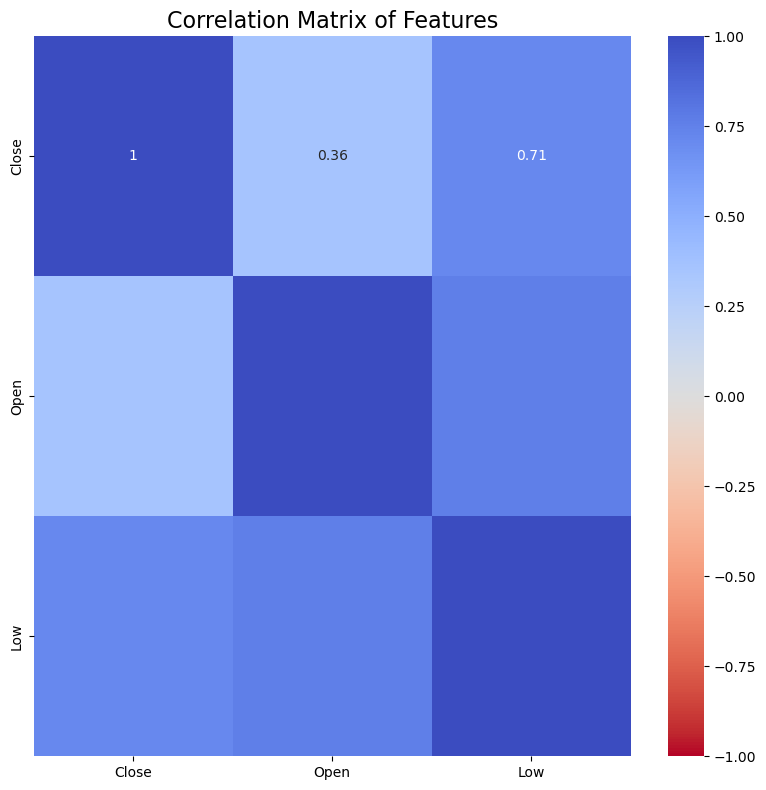

In [92]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

original_cols = ['Close', 
                 'Open',
               'Low']

corrmat = train_data_diff[original_cols].corr()
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
ax.set_title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()

plt.show()

In [93]:
grangers_causation_matrix(train_data_diff, variables = data.columns)

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\sta

,Close_x,Open_x,Low_x
Close_y,1.0,0.0037,0.0019
Open_y,0.0,1.0000,0.0000
Low_y,0.0,0.0000,1.0000


# Dự báo tuyến tính lùi (Sử dụng trong trường hợp các chuỗi dừng với sai phân khác nhau)

In [94]:
def cal_gamma_0(n, array):
  gamma_0 = 0
  for i in range(n):
    temp = array[i] * array[i]
    gamma_0 += temp
  gamma_0 = gamma_0 / n
  return gamma_0
def cal_gamma_1(n, array):
  gamma_1 = 0
  for i in range(n - 1):
    temp = array[i] * array[i + 1]
    gamma_1 += temp
  gamma_1 = gamma_1 / n
  return gamma_1
def cal_gamma_2(n, array):
  gamma_2 = 0
  for i in range(n - 2):
    temp = array[i] + array[i + 2]
    gamma_2 += temp
  gamma_2 = gamma_2 / n
  return gamma_2
def cal_gamma_3(n, array):
  gamma_3 = 0
  for i in range(n - 3):
    temp = array[i] + array[i + 3]
    gamma_3 += temp
  gamma_3 = gamma_3 / n
  return gamma_3
def theta_3steps(gamma_0, gamma_1, gamma_2, gamma_3):
  Theta = np.zeros((3,1))
  Gamma = np.zeros((3,3))
  gamma = np.zeros((3,1))
  Gamma[0,0] = gamma_0
  Gamma[0,1] = gamma_1
  Gamma[0,2] = gamma_2
  Gamma[1,0] = gamma_1
  Gamma[1,1] = gamma_0
  Gamma[1,2] = gamma_1
  Gamma[2,0] = gamma_2
  Gamma[2,1] = gamma_1
  Gamma[2,2] = gamma_0
  gamma[0,0] = gamma_1
  gamma[1,0] = gamma_2
  gamma[2,0] = gamma_3
  Theta = np.dot(np.linalg.inv(Gamma), gamma)
  return Theta
def predict_prev(array):
  mean = np.mean(array)
  n = len(array)
  array = array - mean
  gamma_0 = cal_gamma_0(n, array)
  gamma_1 = cal_gamma_1(n, array)
  gamma_2 = cal_gamma_2(n, array)
  gamma_3 = cal_gamma_3(n, array)
  Theta = theta_3steps(gamma_0, gamma_1 , gamma_2, gamma_3)
  predict = Theta[0,0] * array[0] + Theta[1,0] * array[1] + Theta[2,0] * array[2] + mean
  return predict

In [95]:
# columns = [] #Tên chuỗi cần bù giá trị
# predicted_data = {}
# for column in columns:
#   array_column = train_data_diff[column].to_numpy()
#   predicted_data[column] = predict_prev(array_column)
# previous_row = pd.DataFrame([predicted_data])
# train_data_diff = pd.concat([previous_row, train_data_diff], ignore_index=True)
# train_data_diff.head()

# Huấn luyện mô hình

In [96]:
model = VAR(train_data_diff)
x = model.select_order(maxlags=30)
x.summary()

d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-25.55,-25.54,8.003e-12,-25.55
1,-26.63,-26.58,2.721e-12,-26.61
2,-26.92,-26.83,2.037e-12,-26.89
3,-27.08,-26.95,1.738e-12,-27.03
4,-27.16,-26.99,1.606e-12,-27.10
5,-27.24,-27.04,1.480e-12,-27.16
6,-27.28,-27.04*,1.420e-12,-27.19
7,-27.30,-27.02,1.399e-12,-27.19
8,-27.32,-27.00,1.369e-12,-27.20
9,-27.34,-26.99,1.334e-12,-27.21*


In [97]:
model_train = model.fit(6)
model_train.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     21:46:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.0793
Nobs:                     1229.00    HQIC:                  -27.2273
Log likelihood:           11611.4    FPE:                1.36961e-12
AIC:                     -27.3165    Det(Omega_mle):     1.30800e-12
--------------------------------------------------------------------
Results for equation Close
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.000843         0.000556            1.515           0.130
L1.Close        -0.340278         0.058680           -5.799           0.000
L1.Open         -0.347647         0.069441           -5.006           0.000
L1.L

# Kiểm tra tương quan phần dư

Sử dụng kiểm định Durbin Watson
Nếu có tương quan (giá trị gần 0 hoặc 4) cần tăng bậc mô hình hoặc đổi mô hình.
Nếu gần 2 thì không có tương quan

In [98]:
from statsmodels.stats.stattools import durbin_watson

In [99]:
def adjust(val, length= 6): return str(val).ljust(length)
residual = durbin_watson(model_train.resid)

for col, val in zip(data.columns, residual):
    print(adjust(col), ':', round(val, 2))

Close  : 1.99
Open   : 2.0
Low    : 2.0


# Dự báo

In [100]:
lag_order = model_train.k_ar
forecast_input = train_data_diff.values[-lag_order:]
forecast_input

array([[ 0.01371316, -0.0078675 ,  0.00162153],
       [ 0.02025603,  0.01032364,  0.02104974],
       [ 0.00674404,  0.02892337,  0.01574828],
       [-0.00014149, -0.02047943, -0.00887316],
       [ 0.01621124,  0.01642742,  0.01721537],
       [-0.00159142,  0.01241125,  0.00736923]])

Dự báo đa bước

In [101]:
fc = model_train.forecast(y=forecast_input, steps=len(test_data))
forecast_data = pd.DataFrame(fc, index=data.index[-len(test_data):], columns=data.columns)
forecast_data

,Close,Open,Low
Date,,,
2024-04-30,-0.000438,-0.000042,-0.001746
2024-05-01,-0.000302,-0.003141,-0.002972
2024-05-02,0.000777,-0.001477,-0.000053
2024-05-03,-0.000093,0.001414,0.000773
2024-05-06,-0.000432,-0.000672,-0.000686
2024-05-07,0.001334,0.001084,0.001245
2024-05-08,0.000222,0.001009,0.001098
2024-05-09,0.000783,0.000178,0.000302
2024-05-10,0.000780,0.000600,0.000506


Dự báo một bước

In [102]:
# test_data_diff = np.log(data[-n_test-1:]).diff()
# test_data_diff = test_data_diff.dropna()
# fc_multi = np.empty((22,3))
# forecast_multi = forecast_input
# for i in range(len(test_data)):
#     fc_multi_i = model_train.forecast(y=forecast_multi, steps=1)
#     fc_multi[i] = fc_multi_i
#     forecast_multi = forecast_multi[1:,:]
#     new_row = test_data_diff.iloc[i].to_numpy().reshape(1, -1)
#     forecast_multi = np.vstack((forecast_multi, new_row))
# forecast_data = pd.DataFrame(fc_multi, index=data.index[-len(test_data):], columns=data.columns)
# forecast_data.head()


Chuyển ngược dữ liệu về ban đầu

In [103]:
forecast_data_all = pd.concat([train_data_diff, forecast_data], ignore_index=True)
new_row = pd.DataFrame([[0, 0, 0]], columns=data.columns)
forecast_data_all = pd.concat([new_row, forecast_data_all], ignore_index=True)
forecast_data_all.head()

,Close,Open,Low
0,0.000000,0.000000,0.000000
1,0.035561,-0.005774,0.012904
2,0.001903,0.030107,0.018844
3,0.010624,-0.004930,0.009887
4,0.013699,0.013619,0.015717


In [104]:
forecast_data_all_return = forecast_data_all.cumsum() + np.log(data).iloc[0]
forecast_data_all_return = np.exp(forecast_data_all_return)
forecast_data_all_return.set_index(data.index, inplace=True)
forecast_data_all_return.head()

,Close,Open,Low
Date,,,
2019-06-03,4170.02,4255.18,4145.45
2019-06-04,4320.98,4230.68,4199.29
2019-06-05,4329.21,4359.99,4279.17
2019-06-06,4375.45,4338.55,4321.69
2019-06-07,4435.80,4398.04,4390.15


In [105]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [106]:
mape_close = mean_absolute_percentage_error(test_data['Close'], forecast_data_all_return['Close'][-n_test:]) 
mape_close

0.02167927020228284

In [107]:
mse_close = mean_squared_error(test_data['Close'], forecast_data_all_return['Close'][-n_test:])
rmse_close = np.sqrt(mse_close)
rmse_close

274.5413234929713

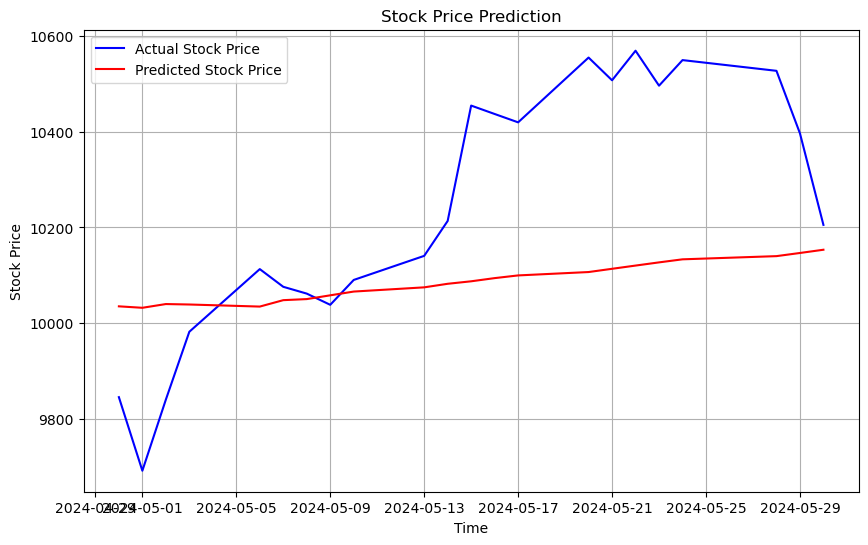

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Close'], color='blue', label='Actual Stock Price')
plt.plot(forecast_data_all_return['Close'][-n_test:], color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Lưu mô hình

In [109]:
# model_train.save('VARMain.pkl')

In [110]:
# np.save('forecast_main.npy', forecast_input)